In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import matplotlib.ticker as ticker

#this code creates the land use graph (Figure 1) in the paper


cnx = sqlite3.connect("BostonHousing.db")

# Define the SQL query
query = """
SELECT year, lu, COUNT(pid) as NumberOfBuildings
FROM assessments
GROUP BY year, lu;
"""

df = pd.read_sql_query(query, cnx)

cnx.close()

# Filter out non-residential land use values
data = df[df['lu'].isin(['R1', 'R2', 'R3', 'R4', 'CD', 'A', 'RC'])]

data['year'] = pd.to_datetime(data['year'], format='%Y')

# Pivot the data so that 'lu' values become new columns, with 'NumberOfBuildings' as values
pivoted = data.pivot(index='year', columns='lu', values='NumberOfBuildings')

# Rename the columns to be more descriptive
pivoted = pivoted.rename(columns={
    'R1' : 'single family',
    'R2' : '2 family',
    'R3' : '3 family',
    'R4' : '4 or more families',
    'CD' : 'Residential condominium unit',
    'A' : '7 or more units',
    'RC' : 'Mixed use'
})

# Fill NaN values with 0, if any (there shouldn't be any)
pivoted = pivoted.fillna(0)






/var/folders/lk/g6tp_z_d4vd9qk_j7tqfsc6h0000gn/T/ipykernel_61314/3653863763.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = pd.to_datetime(data['year'], format='%Y')


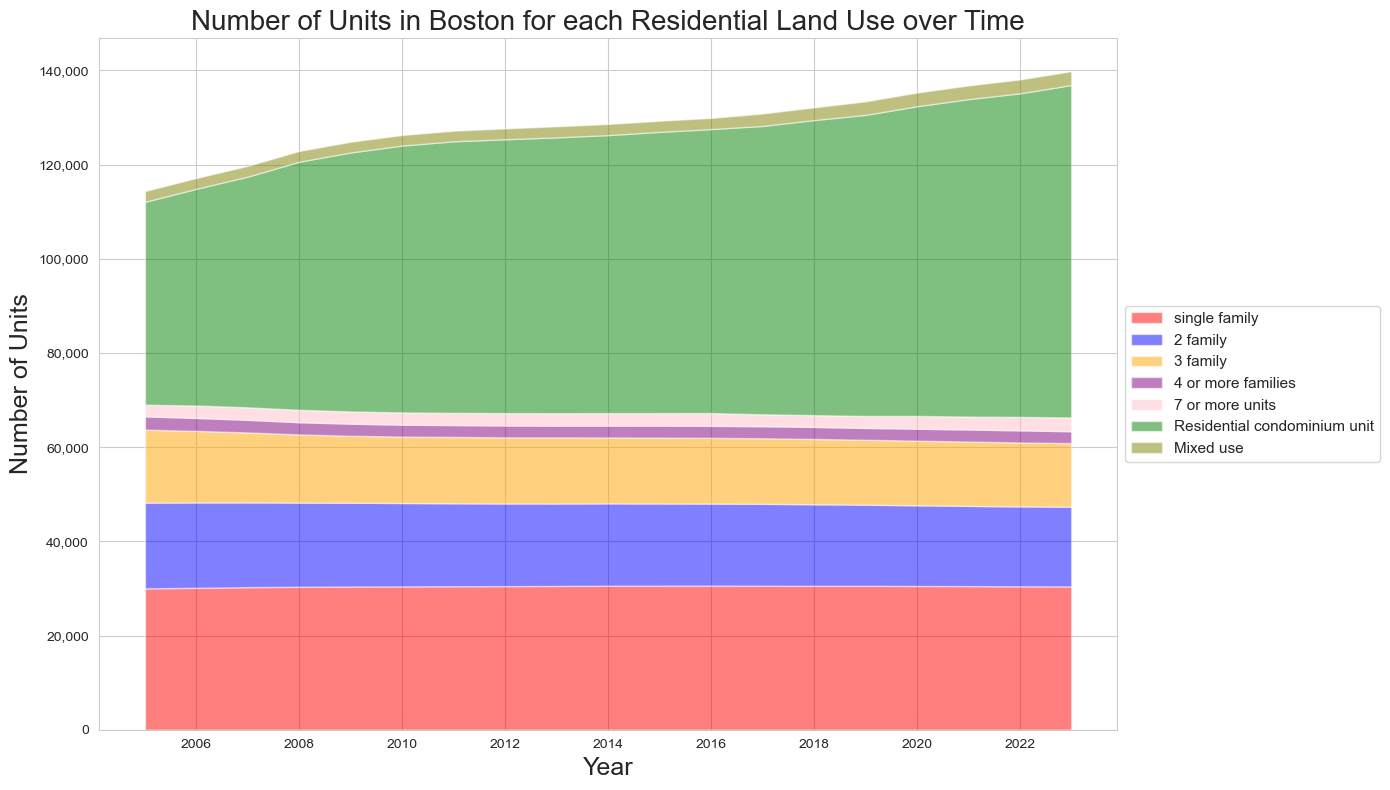

In [51]:
sns.set_style("whitegrid") # otherwise would have no gridlines

colors = ['red','blue','orange','purple','pink','green','olive']


# Reorder the columns
pivoted = pivoted[['single family', '2 family', '3 family', '4 or more families', '7 or more units','Residential condominium unit', 'Mixed use']]

# Then you can plot your stackplot as before
plt.figure(figsize=(14,8))
plt.stackplot(pivoted.index, pivoted.T, labels=pivoted.columns, colors=colors, alpha=0.5)  # Stacked area plot

# Iverson's method for adding commas to y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)
plt.title('Number of Units in Boston for each Residential Land Use over Time', size=20)
plt.xlabel('Year', size=18)
plt.ylabel('Number of Units', size=18)
plt.tight_layout()
plt.show()